In [1]:
import glob
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
from UVTextureConverter import UVConverter
from UVTextureConverter import Normal2Atlas
from UVTextureConverter import Atlas2Normal

In [3]:
base_path = "/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/"

In [4]:
dense_path = base_path + "model_images_dense/"

In [5]:
image_path = base_path + "model_images/"

In [6]:
dest_path = base_path + "model_images_normal_texture/"

In [7]:
dense_list = glob.glob(dense_path + "*")

# getting normal texture map for each of the examples and saving them as an image

In [8]:
for dense in tqdm(dense_list):
    try:
        name = dense.split("/")[-1]
        dense = dense_path + name
        model_image = image_path + name.split(".")[0] + ".jpg"

        dense_array = np.load(dense)
        model_image_pil = Image.open(model_image)
        model_image_array = np.asarray(model_image_pil)[:dense_array.shape[1],:dense_array.shape[2],:]

        solution = 200
        solution_float = float(solution) - 1 

        U = dense_array[1, :, :]
        V = dense_array[2, :, :]
        parts = list()
        for PartInd in range(1, 25):
            actual_part = np.zeros((solution, solution, 3))
            x, y = np.where(dense_array[0,:,:] == PartInd)
            if len(x) == 0:
                parts.append(actual_part)
                continue
            u_current_points = U[x, y]
            v_current_points = V[x, y]

            tex_map_coords = ((255-v_current_points)*solution_float/255.).astype(int), (u_current_points*solution_float/255.).astype(int)
            for c in range(3):
                actual_part[tex_map_coords[0], tex_map_coords[1], c] = model_image_array[x, y, c]

            parts.append(actual_part)
        TextureIm  = np.zeros([solution*6,solution*4,3]);
        for i in range(4):
            for j in range(6):
                TextureIm[ (solution*j):(solution*j+solution)  , (solution*i):(solution*i+solution) ,: ] = parts[i*6+j]
        TextureIm = TextureIm.transpose(1, 0, 2)


        atlas_tex_stack = Atlas2Normal.split_atlas_tex(TextureIm)
        converter = Atlas2Normal(atlas_size=solution, normal_size=512)
        normal_tex = converter.convert(atlas_tex_stack)

        normal_pil = Image.fromarray(np.uint8(normal_tex * 255))
        normal_pil.save(dest_path + name + ".jpg")
    except:
        print(name)

## getting atlas texture for the same images and saving them as image

In [8]:
dest_path = base_path + "model_images_atlas_texture/"

In [9]:
for dense in tqdm(dense_list):
    try:
        name = dense.split("/")[-1]
        dense = dense_path + name
        model_image = image_path + name.split(".")[0] + ".jpg"

        dense_array = np.load(dense)
        model_image_pil = Image.open(model_image)
        model_image_array = np.asarray(model_image_pil)[:dense_array.shape[1],:dense_array.shape[2],:]

        solution = 200
        solution_float = float(solution) - 1 

        U = dense_array[1, :, :]
        V = dense_array[2, :, :]
        parts = list()
        for PartInd in range(1, 25):
            actual_part = np.zeros((solution, solution, 3))
            x, y = np.where(dense_array[0,:,:] == PartInd)
            if len(x) == 0:
                parts.append(actual_part)
                continue
            u_current_points = U[x, y]
            v_current_points = V[x, y]

            tex_map_coords = ((225-v_current_points)*solution_float/255.).astype(int), (u_current_points*solution_float/255.).astype(int)
            for c in range(3):
                actual_part[tex_map_coords[0], tex_map_coords[1], c] = model_image_array[x, y, c]

            parts.append(actual_part)
        TextureIm  = np.zeros([solution*6,solution*4,3]);
        for i in range(4):
            for j in range(6):
                TextureIm[ (solution*j):(solution*j+solution)  , (solution*i):(solution*i+solution) ,: ] = parts[i*6+j]
        TextureIm = TextureIm.transpose(1, 0, 2)


        

        normal_pil = Image.fromarray(np.uint8(TextureIm))
        normal_pil.save(dest_path + name + ".jpg")
    except:
        print(name)

# important links
https://github.com/facebookresearch/DensePose/issues/146
https://github.com/facebookresearch/DensePose/tree/9e94461b1b7cd9de4fabc5e1bc97525125165a22/notebooks
https://github.com/kuboshizuma/UVTextureConverter
https://github.com/facebookresearch/DensePose/issues/68

# other miscellaneous stuffs

In [7]:
len(dense_list)

6189

In [8]:
dense_list[0]

'/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images_dense/MOQ21E037-A11@8.npy'

In [9]:
name = dense_list[0].split("/")[-1]
dense = dense_path + name
model_image = image_path + name.split(".")[0] + ".jpg"

In [106]:
dense_array = np.moveaxis(np.load(dense), 0, -1)
dense_array = dense_array[...,[1, 2, 0]]
print(dense_array.shape)
type(dense_array)
dense_pil = Image.fromarray(dense_array)
type(dense_pil)
dense_pil.save("dense.jpg")

(1927, 641, 3)


In [107]:
model_image_array = np.asarray(Image.open(model_image))[:dense_array.shape[0],:dense_array.shape[1],:]
# model_image_array = model_image_array
print(model_image_array.shape)
type(model_image_array)
model_image_pil = Image.fromarray(model_image_array)
type(model_image_pil)
model_image_pil.save("model_image.jpg")

(1927, 641, 3)


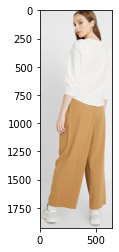

In [8]:
im = Image.open("./model_image.jpg")
plt.imshow(im)

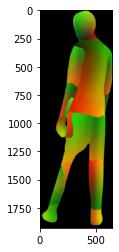

In [18]:
iuv = Image.open("./dense.jpg")
plt.imshow(iuv)

In [108]:
tex_trans, mask_trans = UVConverter.create_texture("./dense.jpg", "./model_image.jpg", parts_size=200, concat=False)

In [109]:
tex = UVConverter.concat_atlas_tex(tex_trans)

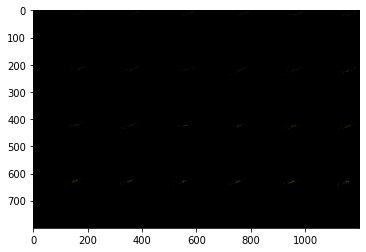

In [110]:
plt.imshow(tex)

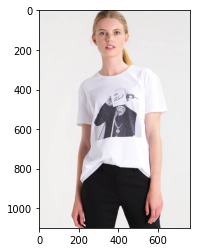

In [92]:
im = Image.open("./human.jpg")
plt.imshow(im)

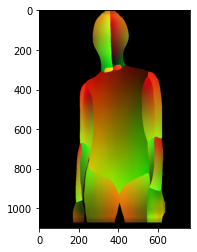

In [93]:
iuv = Image.open("./human_IUV.jpg")
plt.imshow(iuv)

In [209]:
tex_trans, mask_trans = UVConverter.create_texture("./human.jpg", "./human_IUV.jpg", parts_size=200, concat=False)

In [210]:
tex = UVConverter.concat_atlas_tex(tex_trans)

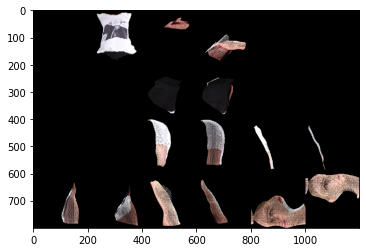

In [211]:
plt.imshow(tex)

In [212]:
tex.shape

(800, 1200, 3)

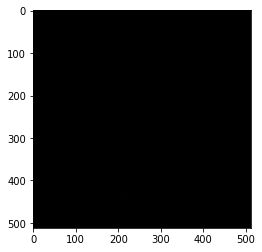

In [216]:
atlas_tex_stack = Atlas2Normal.split_atlas_tex(tex)

converter = Atlas2Normal(atlas_size=200, normal_size=512)
normal_tex = converter.convert(atlas_tex_stack)
plt.imshow(normal_tex)

# code for texture

In [155]:
name = dense_list[0].split("/")[-1]
dense = dense_path + name
model_image = image_path + name.split(".")[0] + ".jpg"

In [156]:
dense_array = np.load(dense)
dense_array.shape

(3, 1927, 641)

In [161]:
model_image_pil = Image.open(model_image)
model_image_array = np.asarray(model_image_pil)[:dense_array.shape[1],:dense_array.shape[2],:]
model_image_array.shape

(1927, 641, 3)

In [168]:
U = dense_array[1, :, :]
V = dense_array[2, :, :]
parts = list()

for PartInd in range(1, 25):
    actual_part = np.zeros((200, 200, 3))
    x, y = np.where(dense_array[0,:,:] == PartInd)
    if len(x) == 0:
        parts.append(actual_part)
        continue
    u_current_points = U[x, y]
    v_current_points = V[x, y]
    
    tex_map_coords = ((225-v_current_points)*199./255.).astype(int), (u_current_points*199./255.).astype(int)
    for c in range(3):
        actual_part[tex_map_coords[0], tex_map_coords[1], c] = model_image_array[x, y, c]
        
    parts.append(actual_part)

In [170]:
len(parts)

24

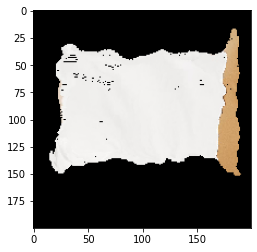

In [202]:
plt.imshow(parts[0]/255)

In [218]:
solution = 200
TextureIm  = np.zeros([solution*6,solution*4,3]);

for i in range(4):
    for j in range(6):
        TextureIm[ (solution*j):(solution*j+solution)  , (solution*i):(solution*i+solution) ,: ] = parts[i*6+j]
        
# TextureIm = TextureIm.transpose([1,0,2])/255

In [219]:
TextureIm.shape

(1200, 800, 3)

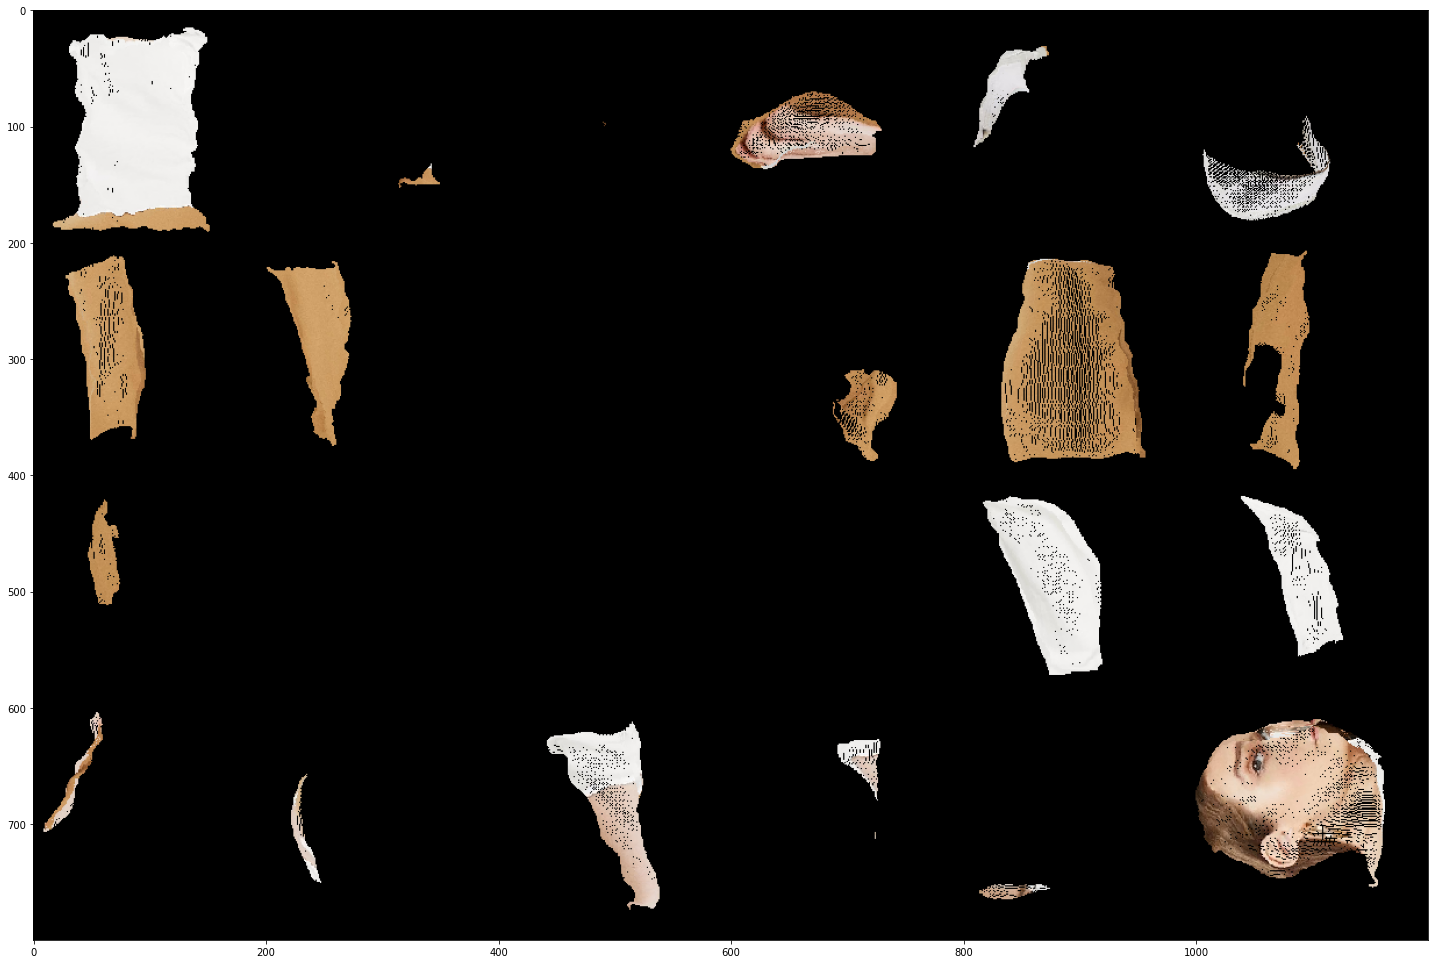

In [214]:
plt.figure(figsize = (25, 25))
plt.imshow(TextureIm)

In [221]:
TextureIm = TextureIm.transpose(1, 0, 2)

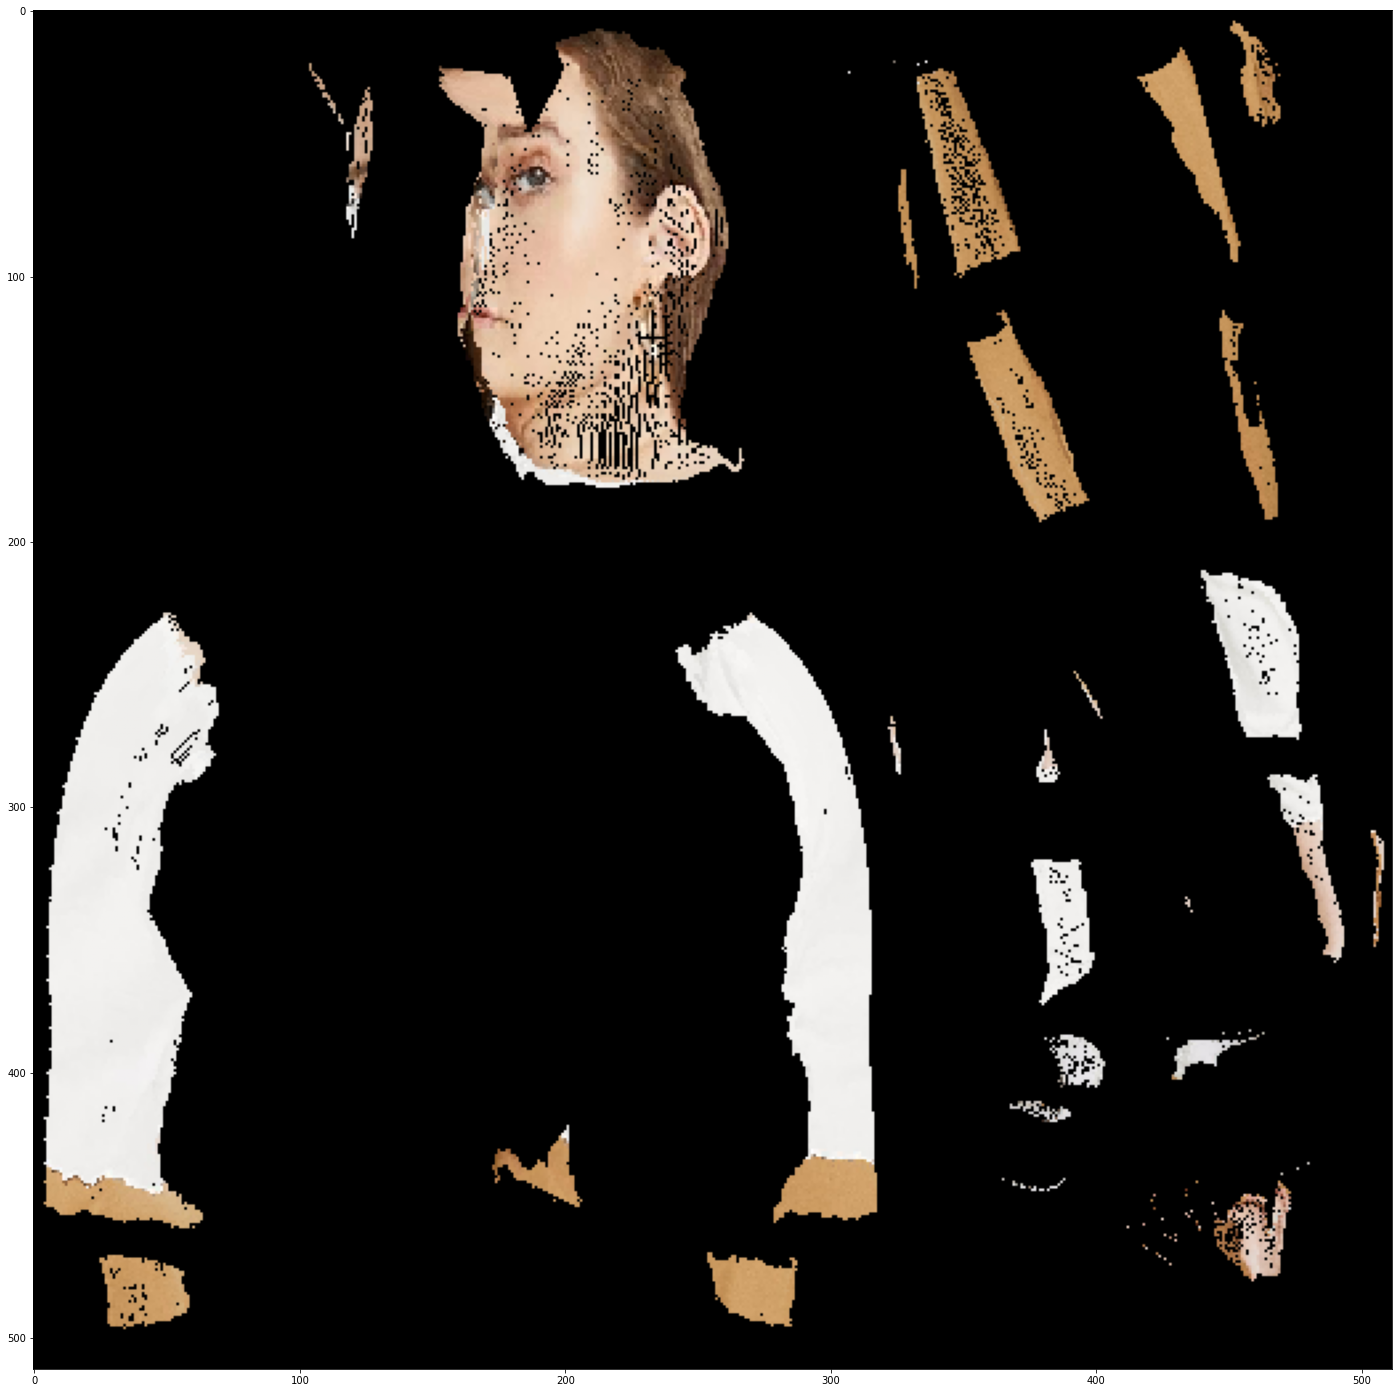

In [224]:
atlas_tex_stack = Atlas2Normal.split_atlas_tex(TextureIm)

converter = Atlas2Normal(atlas_size=200, normal_size=512)
normal_tex = converter.convert(atlas_tex_stack)

plt.figure(figsize = (25, 25))
plt.imshow(normal_tex)

In [225]:
normal_tex.shape

(512, 512, 3)

In [226]:
type(normal_tex)

numpy.ndarray

In [228]:
normal_pil = Image.fromarray(np.uint8(normal_tex * 255))

In [229]:
normal_pil.show()

In [ ]:
normal_pil.save